In [2]:
from keras import backend as K
import time
from keras.layers import *
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


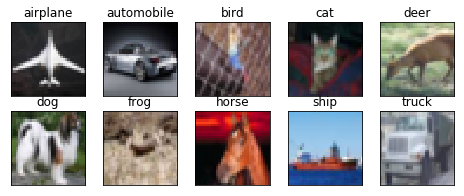

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0902 13:12:15.956667 140316086077312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0902 13:12:15.996826 140316086077312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 13:12:16.002823 140316086077312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0831 10:43:43.576176 139840651126656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 28s 72ms/step - loss: 1.8593 - acc: 0.2820 - val_loss: 1.4136 - val_acc: 0.4675
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3600 - acc: 0.5068 - val_loss: 1.1099 - val_acc: 0.6018
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1260 - acc: 0.5998 - val_loss: 0.9566 - val_acc: 0.6627
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9846 - acc: 0.6567 - val_loss: 0.8659 - val_acc: 0.7000
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8735 - acc: 0.6980 - val_loss: 0.8009 - val_acc: 0.7232
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8158 - acc: 0.7203 - val_loss: 0.7625 - val_acc: 0.7439
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7575 - acc: 0.7416 - val_loss: 0.7143 - val_acc: 0.7562
Epoch 8/50
390/390 [==============================] - 20s 51ms

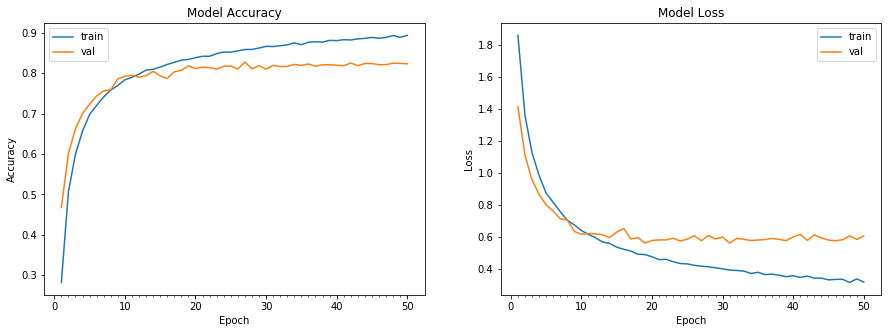

Accuracy on test data is: 82.34


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def conv_bn_relu(**kwargs):
  
  if kwargs['activation']:

    
  
    model.add(Convolution2D(kwargs['k_no'], kernel_size=kwargs['kernel'],kernel_regularizer=regularizers.l2(l=0.0001), border_mode='same',activation='relu', input_shape=(32, 32, 3)))
  else:
    model.add(Convolution2D(kwargs['k_no'], kernel_size=kwargs['kernel'],kernel_regularizer=regularizers.l2(l=0.0001), border_mode='same', input_shape=(32, 32, 3)))  
  model.add(BatchNormalization())
  model.add(Dropout(kwargs['dropout']))  
  return model


In [0]:
# Convolution2D??

In [33]:
model = Sequential()
#Block 1
model=conv_bn_relu(k_no=32,kernel=(3,3),activation=True,dropout=0.0)
model=conv_bn_relu(k_no=64,kernel=(3,3),activation=True,dropout=0.23)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))
model=conv_bn_relu(k_no=32,kernel=(1,1),activation=True,dropout=0.23)

#Block 2
model=conv_bn_relu(k_no=64,kernel=(3,3),activation=True,dropout=0.23)
model=conv_bn_relu(k_no=128,kernel=(3,3),activation=True,dropout=0.23)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model=conv_bn_relu(k_no=32,kernel=(1,1),activation=True,dropout=0.23)

#Block 3
model=conv_bn_relu(k_no=128,kernel=(3,3),activation=True,dropout=0.20)
model=conv_bn_relu(k_no=256,kernel=(3,3),activation=True,dropout=0.0)
model.add(Conv2D(10,kernel_size=(1,1)))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., activation="relu", input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., activation="relu", input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(1, 1), kernel_regularizer=<keras.reg..., activation="relu", input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., activation="rel

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_59 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_45 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_60 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)       

In [14]:
from google.colab import drive
drive.mount('gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive/


In [15]:
%cd gdrive/'My Drive'/EVA2_2019

/content/gdrive/My Drive/EVA2_2019


In [16]:
filepath=input('Enter weights file path')

Enter weights file pathEVA2_6assignment_sequential_model_weights_with2lackparams.hdf5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=10)`
  from ipykernel import kernelapp as app


Epoch 1/10
390/390 [==============================] - 39s 99ms/step - loss: 1.4878 - acc: 0.4731 - val_loss: 1.3292 - val_acc: 0.5750

Epoch 00001: val_acc improved from -inf to 0.57500, saving model to EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5
Epoch 2/10
390/390 [==============================] - 35s 89ms/step - loss: 1.1156 - acc: 0.6202 - val_loss: 1.3010 - val_acc: 0.5865

Epoch 00002: val_acc improved from 0.57500 to 0.58650, saving model to EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5
Epoch 3/10
390/390 [==============================] - 34s 88ms/step - loss: 0.9871 - acc: 0.6708 - val_loss: 0.9825 - val_acc: 0.6729

Epoch 00003: val_acc improved from 0.58650 to 0.67290, saving model to EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5
Epoch 4/10
390/390 [==============================] - 35s 89ms/step - loss: 0.9069 - acc: 0.7006 - val_loss: 0.9143 - val_acc: 0.6984

Epoch 00004: val_acc improved from 0.67290 to 0.69840, saving

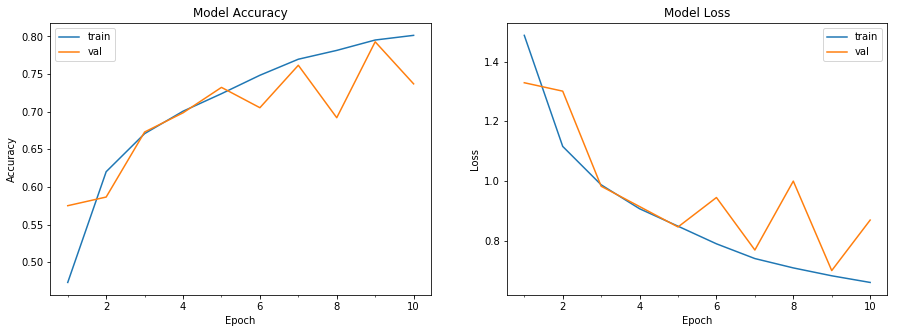

Accuracy on test data is: 73.69


In [35]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/90
  1/390 [..............................] - ETA: 43s - loss: 0.6281 - acc: 0.8125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=90)`
  """


390/390 [==============================] - 35s 89ms/step - loss: 0.6437 - acc: 0.8084 - val_loss: 0.7864 - val_acc: 0.7594

Epoch 00001: val_acc did not improve from 0.79280
Epoch 2/90
390/390 [==============================] - 34s 88ms/step - loss: 0.6296 - acc: 0.8151 - val_loss: 0.7440 - val_acc: 0.7822

Epoch 00002: val_acc did not improve from 0.79280
Epoch 3/90
390/390 [==============================] - 35s 89ms/step - loss: 0.6116 - acc: 0.8239 - val_loss: 0.6856 - val_acc: 0.8023

Epoch 00003: val_acc improved from 0.79280 to 0.80230, saving model to EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5
Epoch 4/90
390/390 [==============================] - 35s 89ms/step - loss: 0.6013 - acc: 0.8299 - val_loss: 0.6949 - val_acc: 0.8037

Epoch 00004: val_acc improved from 0.80230 to 0.80370, saving model to EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5
Epoch 5/90
390/390 [==============================] - 34s 88ms/step - loss: 0.5845 - acc: 0.8365 - val_

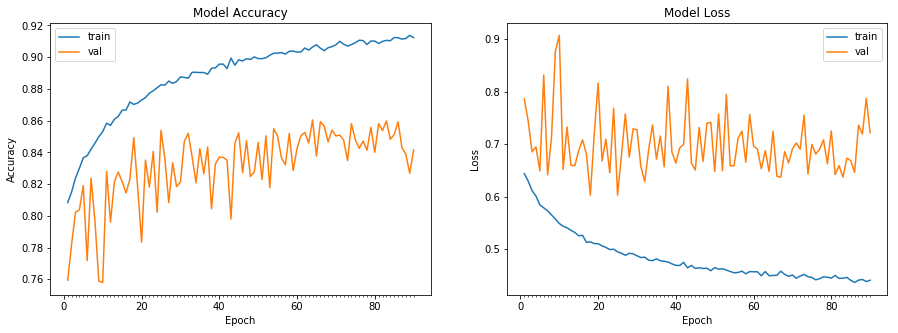

Accuracy on test data is: 84.15


In [36]:
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Epoch 1/50
390/390 [==============================] - 42s 109ms/step - loss: 1.3727 - acc: 0.5173 - val_loss: 1.4120 - val_acc: 0.5320
Epoch 2/50
390/390 [==============================] - 36s 93ms/step - loss: 0.9899 - acc: 0.6613 - val_loss: 1.3295 - val_acc: 0.5454
Epoch 3/50
390/390 [==============================] - 36s 93ms/step - loss: 0.8630 - acc: 0.7041 - val_loss: 1.5169 - val_acc: 0.5060
Epoch 4/50
390/390 [==============================] - 36s 93ms/step - loss: 0.7658 - acc: 0.7392 - val_loss: 0.7969 - val_acc: 0.7261
Epoch 5/50
390/390 [==============================] - 36s 93ms/step - loss: 0.6868 - acc: 0.7673 - val_loss: 0.8657 - val_acc: 0.7133
Epoch 6/50
390/390 [==============================] - 36s 93ms/step - loss: 0.6347 - acc: 0.7819 - val_loss: 0.7063 - val_acc: 0.7586
Epoch 7/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5927 - acc: 0.7991 - val_loss: 0.7099 - val_acc: 0.7543
Epoch 8/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5529 - acc: 0.8118 - val_loss: 0.9482 - val_acc: 0.7019
Epoch 9/50
390/390 [==============================] - 37s 94ms/step - loss: 0.5232 - acc: 0.8230 - val_loss: 0.8420 - val_acc: 0.7214
Epoch 10/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4950 - acc: 0.8315 - val_loss: 0.6809 - val_acc: 0.7732
Epoch 11/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4799 - acc: 0.8354 - val_loss: 0.6109 - val_acc: 0.7900
Epoch 12/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4464 - acc: 0.8490 - val_loss: 0.5865 - val_acc: 0.8104
Epoch 13/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4315 - acc: 0.8530 - val_loss: 0.7340 - val_acc: 0.7530
Epoch 14/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4154 - acc: 0.8595 - val_loss: 0.5868 - val_acc: 0.8030
Epoch 15/50
390/390 [==============================] - 37s 94ms/step - loss: 0.4009 - acc: 0.8628 - val_loss: 0.5697 - val_acc: 0.8119
Epoch 16/50
390/390 [==============================] - 36s 94ms/step - loss: 0.3832 - acc: 0.8690 - val_loss: 0.5884 - val_acc: 0.8072
Epoch 17/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3658 - acc: 0.8764 - val_loss: 0.5832 - val_acc: 0.8080
Epoch 18/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3563 - acc: 0.8795 - val_loss: 0.5284 - val_acc: 0.8303
Epoch 19/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3460 - acc: 0.8818 - val_loss: 0.5032 - val_acc: 0.8335
Epoch 20/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3349 - acc: 0.8866 - val_loss: 0.6011 - val_acc: 0.8083
Epoch 21/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3247 - acc: 0.8895 - val_loss: 0.5980 - val_acc: 0.8128
Epoch 22/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3111 - acc: 0.8940 - val_loss: 0.5033 - val_acc: 0.8368
Epoch 23/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3004 - acc: 0.8971 - val_loss: 0.5645 - val_acc: 0.8212
Epoch 24/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2926 - acc: 0.9008 - val_loss: 0.5974 - val_acc: 0.8126
Epoch 25/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2835 - acc: 0.9036 - val_loss: 0.5090 - val_acc: 0.8362
Epoch 26/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2744 - acc: 0.9060 - val_loss: 0.4880 - val_acc: 0.8414
Epoch 27/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2608 - acc: 0.9130 - val_loss: 0.5107 - val_acc: 0.8372
Epoch 28/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2624 - acc: 0.9109 - val_loss: 0.7523 - val_acc: 0.7709
Epoch 29/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2494 - acc: 0.9154 - val_loss: 0.6111 - val_acc: 0.8099
Epoch 30/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2445 - acc: 0.9155 - val_loss: 0.5028 - val_acc: 0.8408
Epoch 31/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2412 - acc: 0.9180 - val_loss: 0.5640 - val_acc: 0.8244
Epoch 32/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2338 - acc: 0.9202 - val_loss: 0.5631 - val_acc: 0.8281
Epoch 33/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2248 - acc: 0.9225 - val_loss: 0.4766 - val_acc: 0.8499
Epoch 34/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2250 - acc: 0.9222 - val_loss: 0.5090 - val_acc: 0.8399
Epoch 35/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2128 - acc: 0.9270 - val_loss: 0.5243 - val_acc: 0.8398
Epoch 36/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2058 - acc: 0.9302 - val_loss: 0.5299 - val_acc: 0.8378
Epoch 37/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2010 - acc: 0.9316 - val_loss: 0.5041 - val_acc: 0.8491
Epoch 38/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2002 - acc: 0.9326 - val_loss: 0.4713 - val_acc: 0.8514
Epoch 39/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1913 - acc: 0.9344 - val_loss: 0.5819 - val_acc: 0.8250
Epoch 40/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1892 - acc: 0.9343 - val_loss: 0.5211 - val_acc: 0.8450
Epoch 41/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1864 - acc: 0.9378 - val_loss: 0.5182 - val_acc: 0.8492
Epoch 42/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1852 - acc: 0.9357 - val_loss: 0.5342 - val_acc: 0.8429
Epoch 43/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1737 - acc: 0.9411 - val_loss: 0.6050 - val_acc: 0.8216
Epoch 44/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1712 - acc: 0.9418 - val_loss: 0.4654 - val_acc: 0.8593
Epoch 45/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1666 - acc: 0.9432 - val_loss: 0.5561 - val_acc: 0.8355
Epoch 46/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1618 - acc: 0.9446 - val_loss: 0.4928 - val_acc: 0.8516
Epoch 47/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1621 - acc: 0.9452 - val_loss: 0.5026 - val_acc: 0.8508
Epoch 48/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1586 - acc: 0.9460 - val_loss: 0.5437 - val_acc: 0.8362
Epoch 49/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1524 - acc: 0.9475 - val_loss: 0.5122 - val_acc: 0.8452
Epoch 50/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1551 - acc: 0.9473 - val_loss: 0.5522 - val_acc: 0.8403
Model took 1823.46 seconds to train

Accuracy on test data is: 84.03

Epoch 1/50
390/390 [==============================] - 41s 105ms/step - loss: 1.4224 - acc: 0.5149 - val_loss: 1.5235 - val_acc: 0.4790
Epoch 2/50
390/390 [==============================] - 36s 93ms/step - loss: 1.0449 - acc: 0.6559 - val_loss: 1.2321 - val_acc: 0.5663
Epoch 3/50
390/390 [==============================] - 36s 93ms/step - loss: 0.8936 - acc: 0.7056 - val_loss: 0.8442 - val_acc: 0.7189
Epoch 4/50
390/390 [==============================] - 36s 93ms/step - loss: 0.7844 - acc: 0.7394 - val_loss: 1.1040 - val_acc: 0.6329
Epoch 5/50
390/390 [==============================] - 36s 93ms/step - loss: 0.7110 - acc: 0.7639 - val_loss: 0.8271 - val_acc: 0.7151
Epoch 6/50
390/390 [==============================] - 36s 93ms/step - loss: 0.6600 - acc: 0.7800 - val_loss: 0.6761 - val_acc: 0.7712
Epoch 7/50
390/390 [==============================] - 36s 93ms/step - loss: 0.6123 - acc: 0.7941 - val_loss: 0.8202 - val_acc: 0.7252
Epoch 8/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5796 - acc: 0.8052 - val_loss: 0.7985 - val_acc: 0.7268
Epoch 9/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5490 - acc: 0.8154 - val_loss: 0.6046 - val_acc: 0.7966
Epoch 10/50
390/390 [==============================] - 36s 94ms/step - loss: 0.5232 - acc: 0.8236 - val_loss: 0.7106 - val_acc: 0.7515
Epoch 11/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4953 - acc: 0.8334 - val_loss: 0.5794 - val_acc: 0.8032
Epoch 12/50
390/390 [==============================] - 36s 94ms/step - loss: 0.4830 - acc: 0.8364 - val_loss: 0.6469 - val_acc: 0.7797
Epoch 13/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4610 - acc: 0.8455 - val_loss: 0.6875 - val_acc: 0.7691
Epoch 14/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4435 - acc: 0.8503 - val_loss: 0.6469 - val_acc: 0.7834
Epoch 15/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4245 - acc: 0.8572 - val_loss: 0.5637 - val_acc: 0.8087
Epoch 16/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4171 - acc: 0.8595 - val_loss: 0.7841 - val_acc: 0.7317
Epoch 17/50
390/390 [==============================] - 37s 94ms/step - loss: 0.3985 - acc: 0.8643 - val_loss: 0.7093 - val_acc: 0.7641
Epoch 18/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3916 - acc: 0.8667 - val_loss: 0.6288 - val_acc: 0.7909
Epoch 19/50
390/390 [==============================] - 37s 94ms/step - loss: 0.3758 - acc: 0.8714 - val_loss: 0.6929 - val_acc: 0.7739
Epoch 20/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3632 - acc: 0.8765 - val_loss: 0.5752 - val_acc: 0.8131
Epoch 21/50
390/390 [==============================] - 37s 94ms/step - loss: 0.3603 - acc: 0.8782 - val_loss: 0.5151 - val_acc: 0.8279
Epoch 22/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3449 - acc: 0.8826 - val_loss: 0.6403 - val_acc: 0.7871
Epoch 23/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3359 - acc: 0.8857 - val_loss: 0.5097 - val_acc: 0.8329
Epoch 24/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3279 - acc: 0.8885 - val_loss: 0.4892 - val_acc: 0.8376
Epoch 25/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3216 - acc: 0.8907 - val_loss: 0.7113 - val_acc: 0.7742
Epoch 26/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3083 - acc: 0.8952 - val_loss: 0.5511 - val_acc: 0.8213
Epoch 27/50
390/390 [==============================] - 36s 93ms/step - loss: 0.3053 - acc: 0.8948 - val_loss: 0.5680 - val_acc: 0.8143
Epoch 28/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2966 - acc: 0.8982 - val_loss: 0.5159 - val_acc: 0.8317
Epoch 29/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2868 - acc: 0.9017 - val_loss: 0.4889 - val_acc: 0.8396
Epoch 30/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2820 - acc: 0.9020 - val_loss: 0.5020 - val_acc: 0.8356
Epoch 31/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2755 - acc: 0.9059 - val_loss: 0.6017 - val_acc: 0.8057
Epoch 32/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2712 - acc: 0.9066 - val_loss: 0.5149 - val_acc: 0.8372
Epoch 33/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2652 - acc: 0.9095 - val_loss: 0.4768 - val_acc: 0.8458
Epoch 34/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2573 - acc: 0.9121 - val_loss: 0.5512 - val_acc: 0.8257
Epoch 35/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2553 - acc: 0.9109 - val_loss: 0.5019 - val_acc: 0.8427
Epoch 36/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2519 - acc: 0.9141 - val_loss: 0.5921 - val_acc: 0.8163
Epoch 37/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2391 - acc: 0.9188 - val_loss: 0.5532 - val_acc: 0.8296
Epoch 38/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2377 - acc: 0.9177 - val_loss: 0.4819 - val_acc: 0.8465
Epoch 39/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2378 - acc: 0.9169 - val_loss: 0.5136 - val_acc: 0.8401
Epoch 40/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2331 - acc: 0.9202 - val_loss: 0.5489 - val_acc: 0.8257
Epoch 41/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2229 - acc: 0.9234 - val_loss: 0.5639 - val_acc: 0.8292
Epoch 42/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2182 - acc: 0.9245 - val_loss: 0.5179 - val_acc: 0.8365
Epoch 43/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2155 - acc: 0.9247 - val_loss: 0.5221 - val_acc: 0.8417
Epoch 44/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2159 - acc: 0.9259 - val_loss: 0.5200 - val_acc: 0.8448
Epoch 45/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2064 - acc: 0.9286 - val_loss: 0.5170 - val_acc: 0.8357
Epoch 46/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2028 - acc: 0.9290 - val_loss: 0.5517 - val_acc: 0.8338
Epoch 47/50
390/390 [==============================] - 36s 93ms/step - loss: 0.2015 - acc: 0.9302 - val_loss: 0.6276 - val_acc: 0.8080
Epoch 48/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1974 - acc: 0.9322 - val_loss: 0.5699 - val_acc: 0.8324
Epoch 49/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1921 - acc: 0.9343 - val_loss: 0.4672 - val_acc: 0.8552
Epoch 50/50
390/390 [==============================] - 36s 93ms/step - loss: 0.1919 - acc: 0.9328 - val_loss: 0.4698 - val_acc: 0.8568
Model took 1826.37 seconds to train

Accuracy on test data is: 85.68

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_109 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_103 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_112 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_104 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 32, 32, 32)        2080      
_________________________________________________________________
batch_normalization_105 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_114 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_106 (Bat (None, 16, 16, 32)        128       
_________________________________________________________________
activation_115 (Activation)  (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_107 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
activation_116 (Activation)  (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_108 (Bat (None, 16, 16, 128)       512       
_________________________________________________________________
activation_117 (Activation)  (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 16, 16, 32)        4128      
_________________________________________________________________
batch_normalization_109 (Bat (None, 16, 16, 32)        128       
_________________________________________________________________
activation_118 (Activation)  (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_110 (Bat (None, 8, 8, 64)          256       
_________________________________________________________________
activation_119 (Activation)  (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_111 (Bat (None, 8, 8, 128)         512       
_________________________________________________________________
activation_120 (Activation)  (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 8, 8, 256)         295168    
_________________________________________________________________
batch_normalization_112 (Bat (None, 8, 8, 256)         1024      
_________________________________________________________________
activation_121 (Activation)  (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 8, 8, 10)          2570      
_________________________________________________________________
batch_normalization_113 (Bat (None, 8, 8, 10)          40        
_________________________________________________________________
global_average_pooling2d_8 ( (None, 10)                0         
_________________________________________________________________
activation_122 (Activation)  (None, 10)                0         
=================================================================
Total params: 520,658
Trainable params: 518,974
Non-trainable params: 1,684
_____________________________

In [37]:
!ls

EVA2_6assignment_sequential_model_weights.hdf5
EVA2_6assignment_sequential_model_weights_with2lackparams.hdf5


In [39]:
!git clone https://github.com/shaikkamran/EVA_SchoolOfAi.git

Cloning into 'EVA_SchoolOfAi'...
fatal: could not read Username for 'https://github.com': No such device or address
